STUDENT PERFORMANCE INDICATOR

Life cycle of ML Project
-- Understanding the Problem Statement
-- Data Collection
-- Data Checks to perform
-- Exploratory data analysis
-- Data Pre-Processing
-- Model Training
-- Choose best model

1)PROBLEM STATEMENT 
-- This project understands how the student's performsnce is affected by other variables .

2)DATA COLLECTION
-- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


IMPORT DATA

In [4]:
df = pd.read_csv('data/stud.csv')

Shape of the dataset

In [5]:
df.shape

(1000, 8)

DATASET INFORMATION
-- gender : sex of students -> (Male/female)
-- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
-- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
-- lunch : having lunch before test (standard or free/reduced)
-- test preparation course : complete or not complete before test
-- math score
-- reading score
-- writing score

DATA PREPROCESSING
-- Check Missing values
-- Check Duplicates
-- Check data type
-- Check the number of unique values of each column
-- Check statistics of data set
-- Check various categories present in the different categorical column

Check Missing values

In [6]:
df.isna().sum()  # if there were null values df.dropna()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set

Check Duplicates

In [7]:
df.duplicated().sum() #if there were duplicate values df-drop_duplicates()

0

There are no duplicates values in the data set

Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
-- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
-- All standard deviations are also close - between 14.6 and 15.19;

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
print("Categories in 'gender' variable:",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


FEATURE EXTRACTION 
Adding columns for "Total Score" and "Average"

In [19]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


EXPLORATORY DATA ANALYSIS

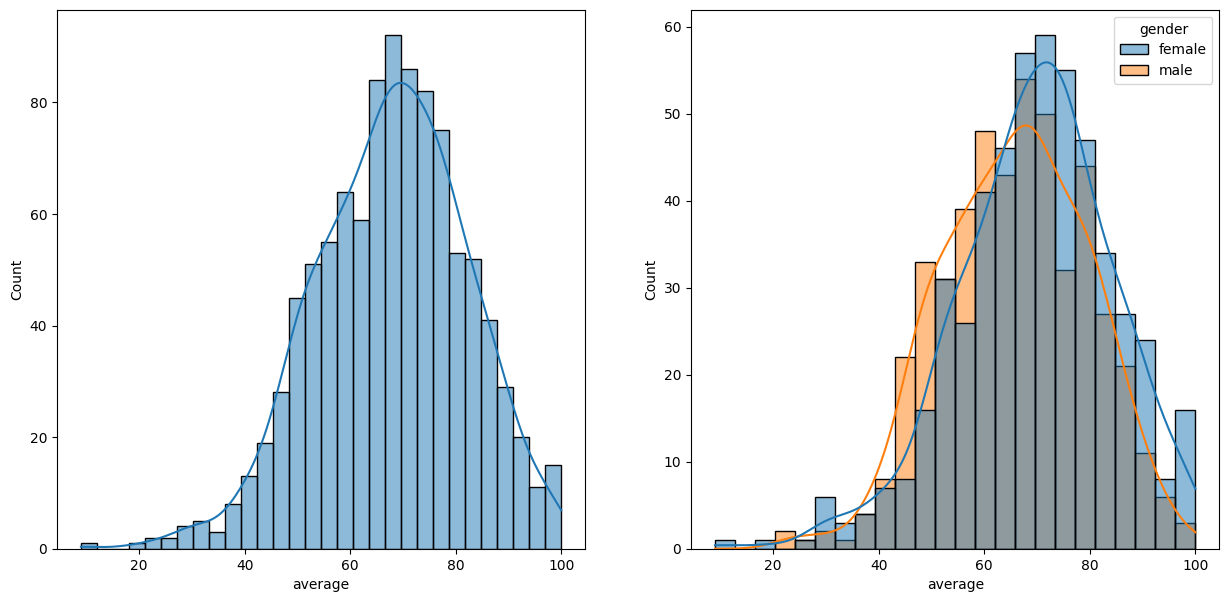

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

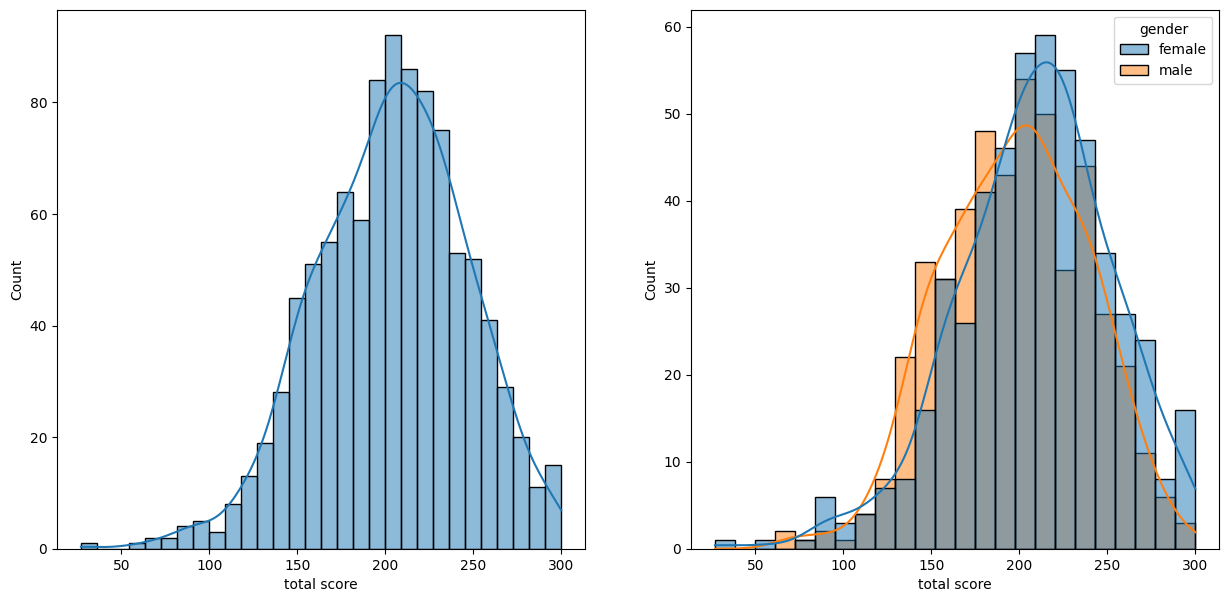

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

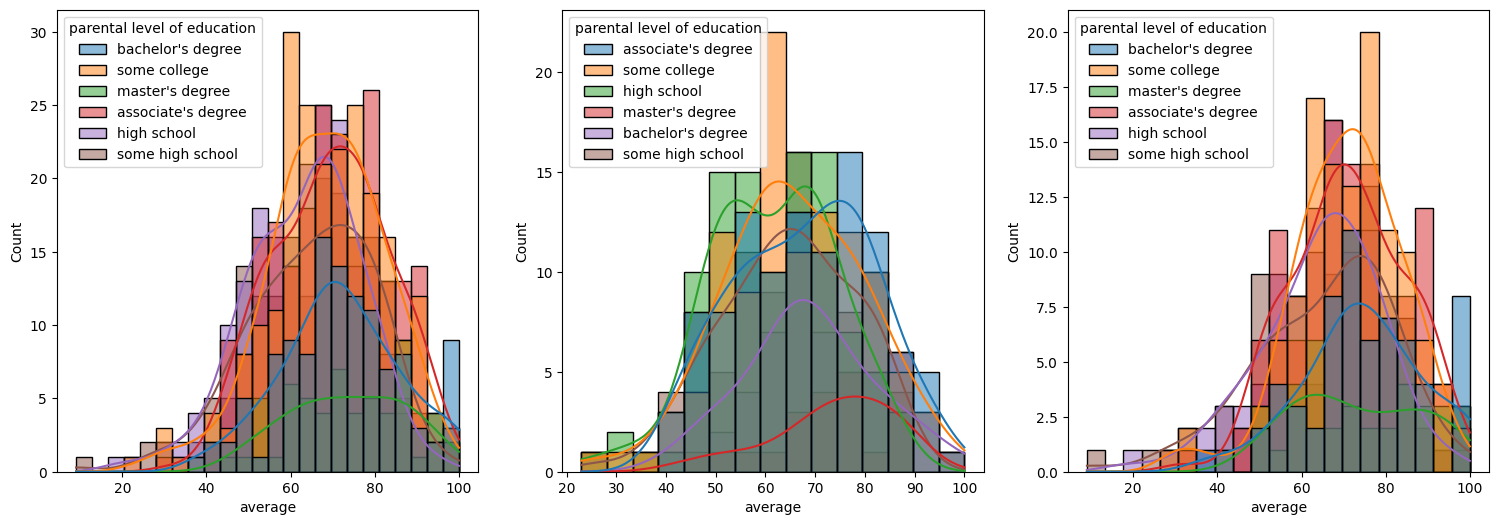

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

Insights
-- parent's education don't help student perform well in exam.

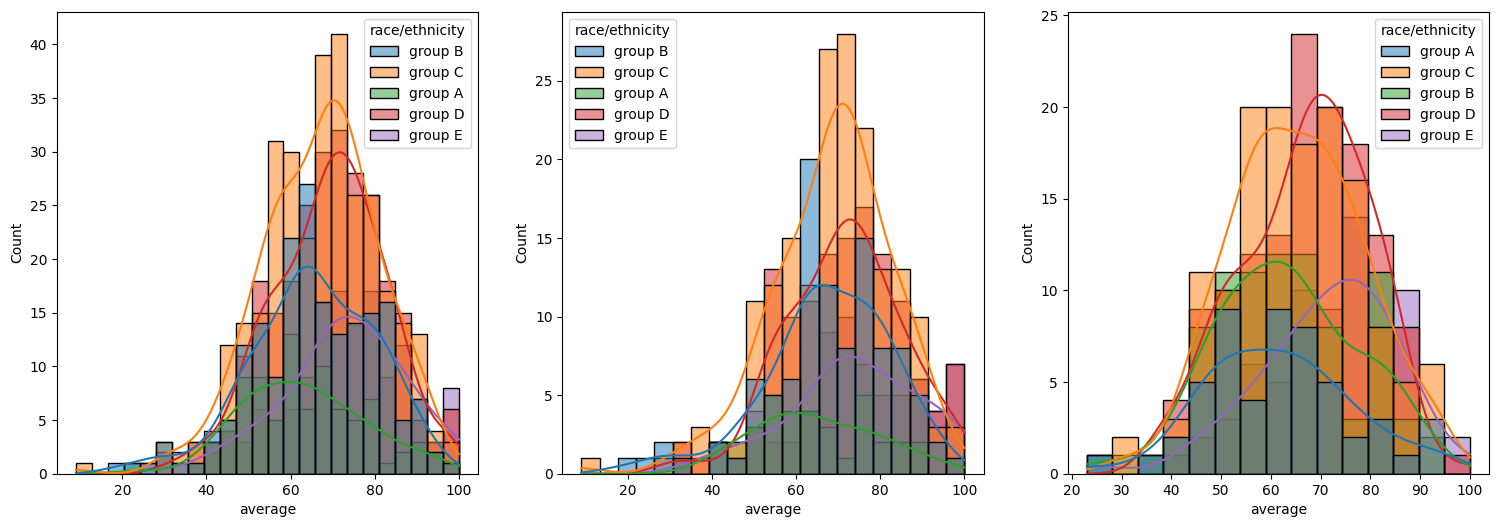

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Insights
-- Students of group A ,group B and group E tends to perform poorly in exam irrespective of whether they are male or female

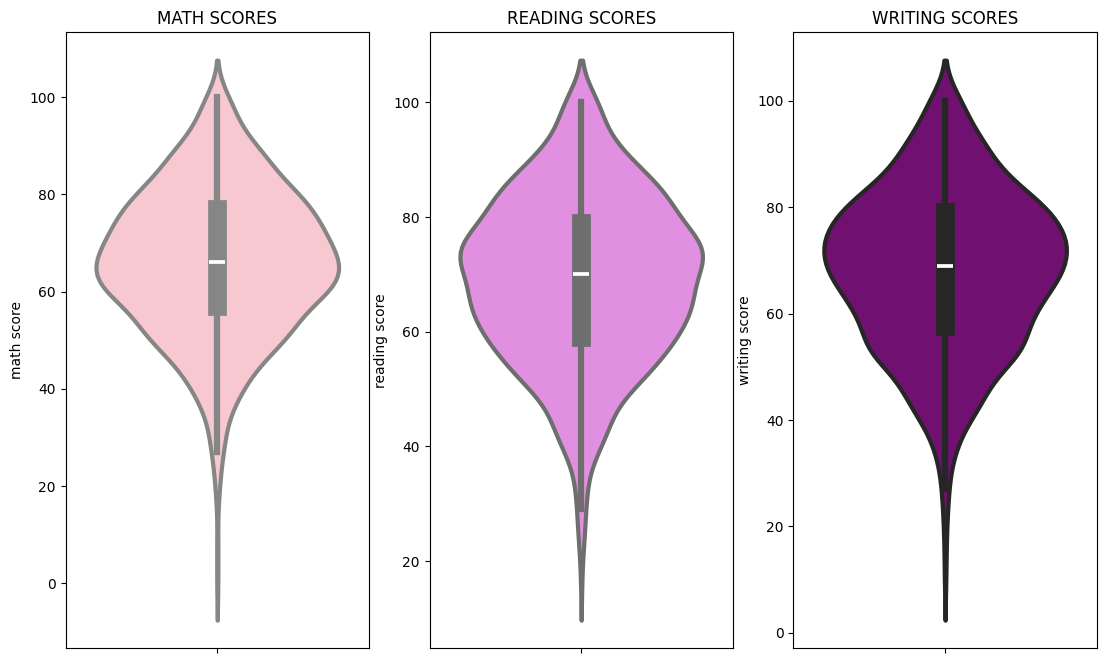

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='pink',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='violet',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='purple',linewidth=3)
plt.show()

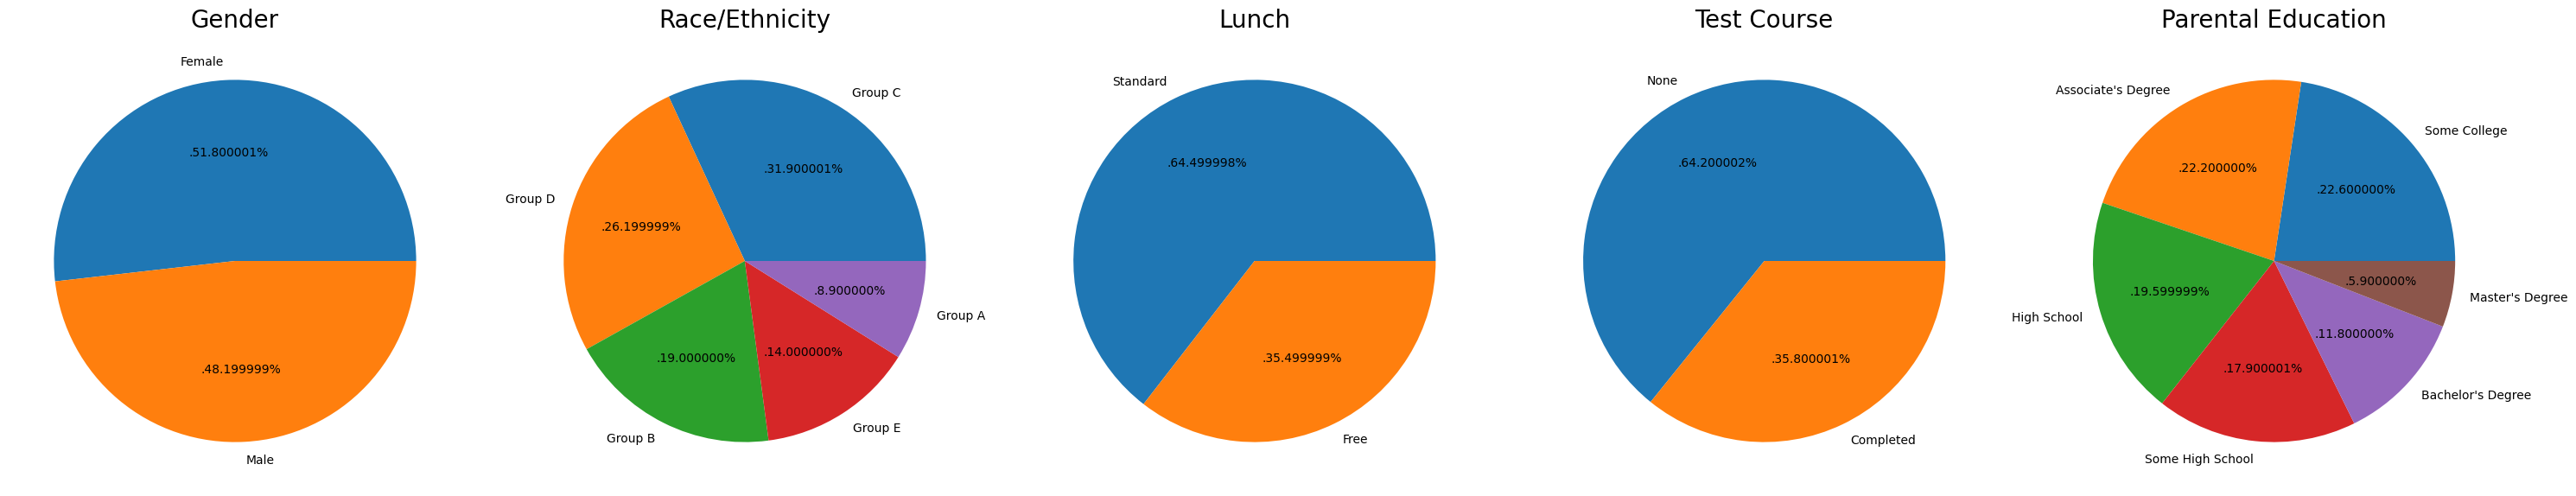

In [47]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'


plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'

plt.pie(size,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'

plt.pie(size,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'

plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"

plt.pie(size,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

UNIVARIATE ANALYSIS

<Axes: xlabel='gender', ylabel='count'>

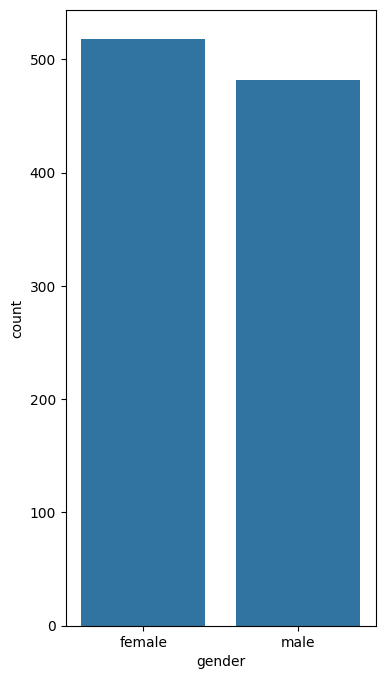

In [37]:
fig=plt.figure(figsize=(4,8))
sns.countplot(x=df['gender'],data=df)

Insights
-- Gender has almost balanced data with female students are 518 and male students are 482

<Axes: xlabel='race/ethnicity', ylabel='count'>

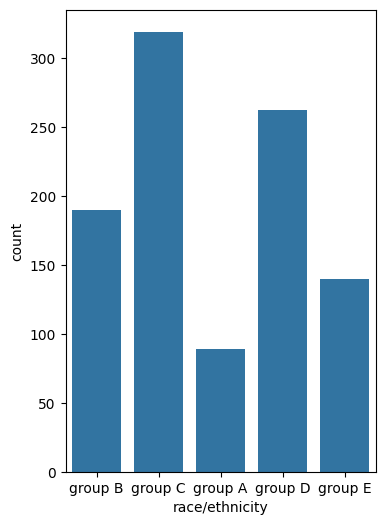

In [44]:
fig=plt.figure(figsize=(4,6))
sns.countplot(x=df['race/ethnicity'],data=df)

Insights
Most of the student belonging from group C.
Lowest number of students belong to groupA.

<Axes: xlabel='parental level of education', ylabel='count'>

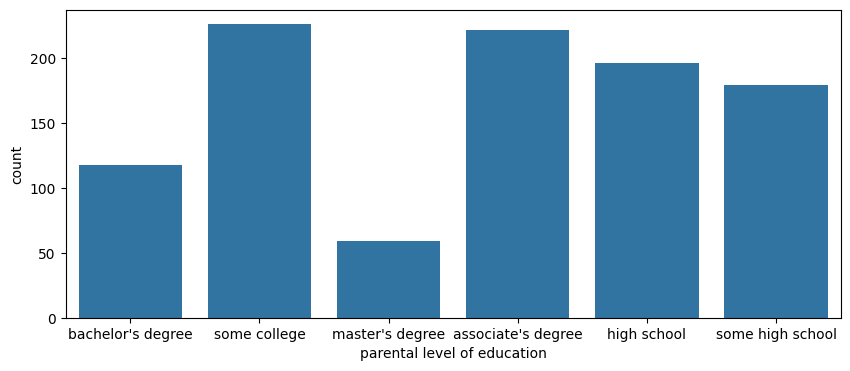

In [43]:
fig=plt.figure(figsize=(10,4))
sns.countplot(x=df['parental level of education'])

Insights
-- Largest number of parents are from some college.

<Axes: xlabel='lunch', ylabel='count'>

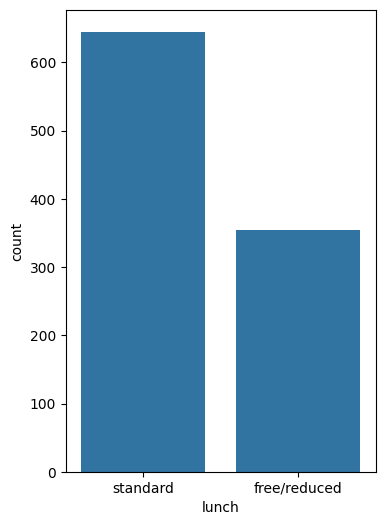

In [46]:
fig=plt.figure(figsize=(4,6))
sns.countplot(x=df['lunch'])

Insights
-- Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

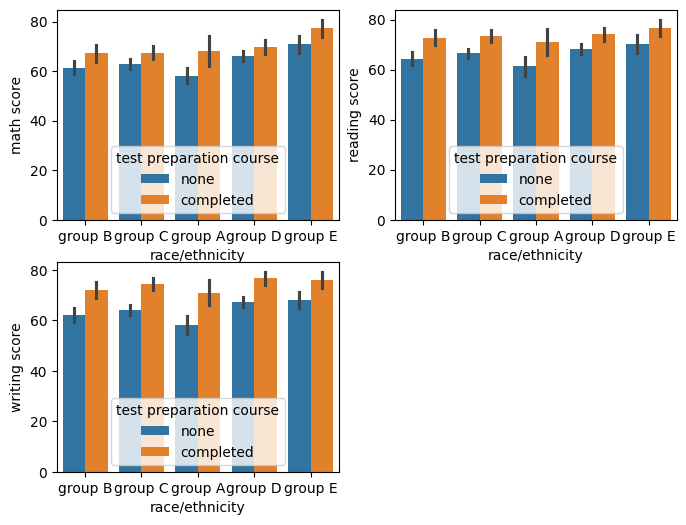

In [48]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.barplot (x=df['race/ethnicity'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['race/ethnicity'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['race/ethnicity'], y=df['writing score'], hue=df['test preparation course'])

Insights
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't completed the course

Checking Outliers

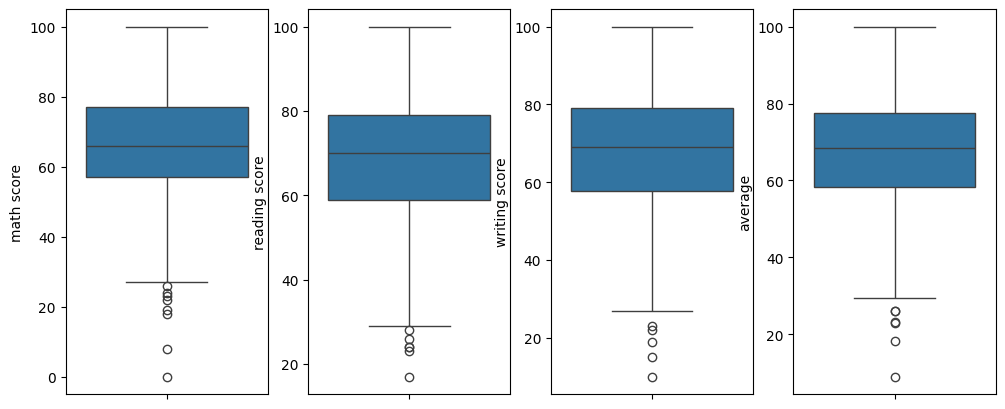

In [50]:
plt.subplots(1,4,figsize=(12,5))
plt.subplot(141)
sns.boxplot(df['math score'])
plt.subplot(142)
sns.boxplot(df['reading score'])
plt.subplot(143)
sns.boxplot(df['writing score'])
plt.subplot(144)
sns.boxplot(df['average'])
plt.show()

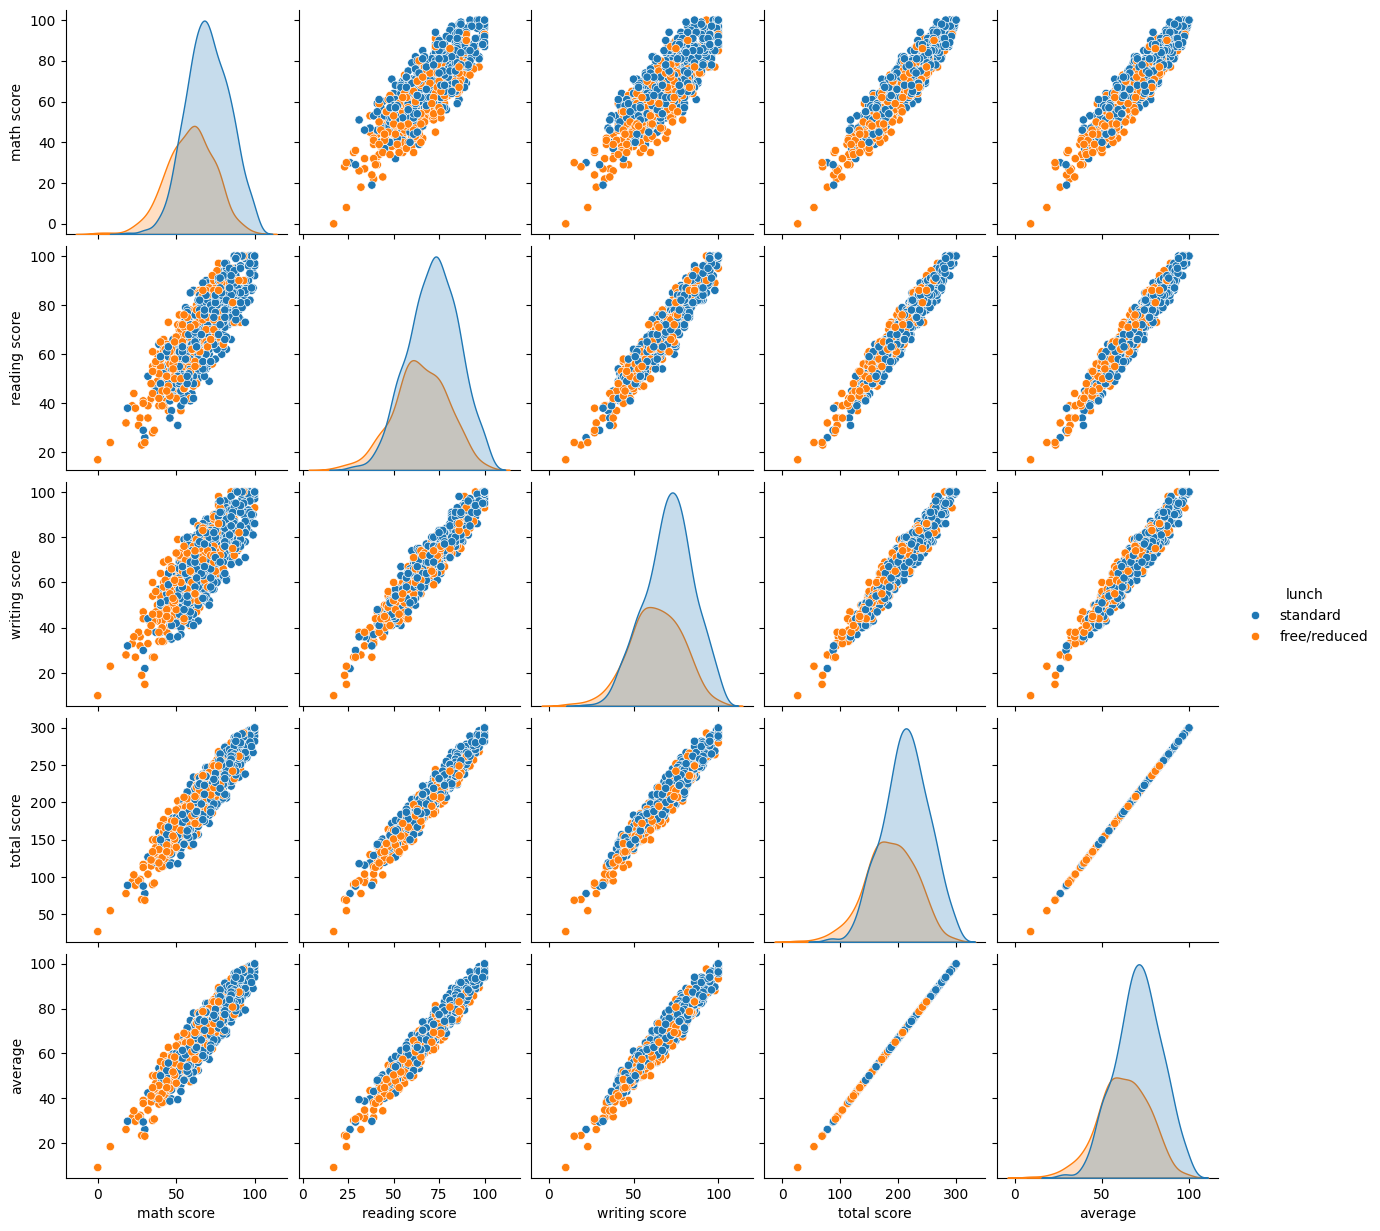

In [52]:
sns.pairplot(df,hue = 'lunch')
plt.show()

Conclusions
-- Student's Performance is related with lunch, race, test preparation course